In [1]:
import kwant
from kwant.digest import uniform    # a (deterministic) pseudorandom number generator
#import matplotlib.pyplot
#from matplotlib import pyplot as plt
%run matplotlib_setup.ipy

import numpy as np
from cmath import exp
from types import SimpleNamespace

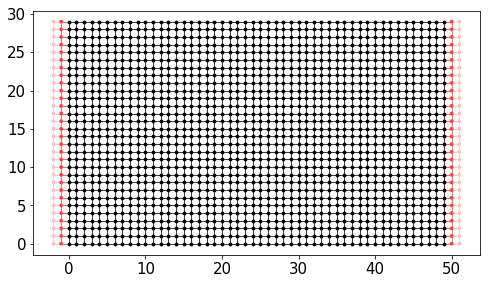

In [2]:
lat = kwant.lattice.square(a=1)

t = 1
W = 30
L = 50

def onsite(site, params):
    return  params.U0 * (uniform(repr(site), repr(params.salt)) - 0.5) + 4 * t

def hopping(site_i, site_j, params):
    xi, yi = site_i.pos
    xj, yj = site_j.pos
    return -exp(-0.5j * params.phi * (xi - xj) * (yi + yj))

sys = kwant.Builder()
sys[(lat(x, y) for x in range(L) for y in range(W))] = onsite
sys[lat.neighbors()] = hopping

lead = kwant.Builder(kwant.TranslationalSymmetry([-1, 0]))
lead[(lat(0, y) for y in range(W))] = 4 * t   # no disorder in lead!
lead[lat.neighbors()] = hopping

sys.attach_lead(lead)
sys.attach_lead(lead.reversed())

sys = sys.finalized()

kwant.plot(sys);

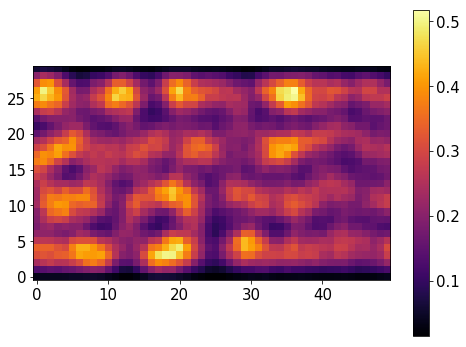

<function __main__.plot_wf>

In [3]:
from ipywidgets import interact

U0 = 0.3
salt = 13
energy = 0.2

def plot_wf(phi=0):
    params = SimpleNamespace(phi=phi, U0=U0, salt=salt)
    wfs = kwant.wave_function(sys, energy=energy, args=[params])
    scattering_wf = wfs(0)  # all scattering wave functions from lead 0
    kwant.plotter.map(sys, np.sum(abs(scattering_wf)**2, axis=0));

interact(plot_wf, phi=(0, 0.15, 0.002))

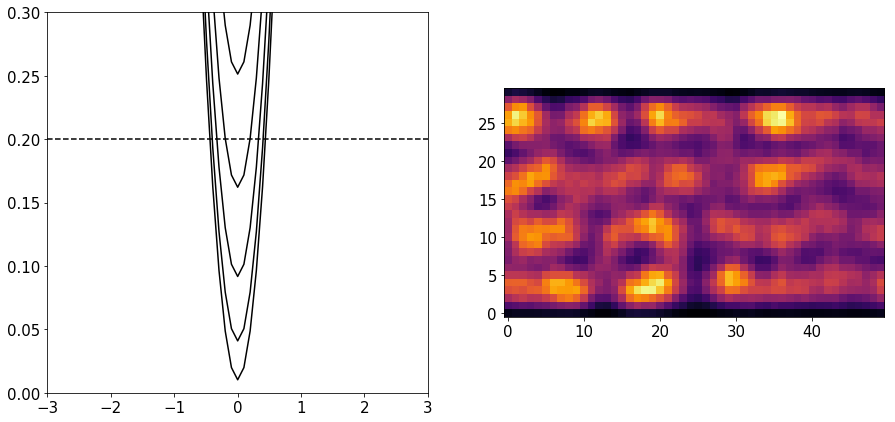

<function __main__.plot_wf>

In [4]:
U0 = 0.3
salt = 13
energy = 0.2

def plot_wf(phi=0):
    params = SimpleNamespace(phi=phi, U0=U0, salt=salt)
    wfs = kwant.wave_function(sys, energy=energy, args=[params])
    scattering_wf = wfs(0)  # all scattering wave functions from lead 0
    
    fig = plt.Figure(figsize=(15,7))
    ax1 = fig.add_subplot(121)
    kwant.plotter.bands(sys.leads[0], args=[params], ax=ax1)
    ax1.set_ylim(0, 0.3)
    ax1.set_xlim(-3, 3)
    ax1.plot([-4,4], [energy]*2, "k--")
    ax2 = fig.add_subplot(122)
    kwant.plotter.map(sys, np.sum(abs(scattering_wf)**2, axis=0), ax=ax2)
    kwant.plotter.output_fig(fig)

    
interact(plot_wf, phi=(0, 0.15, 0.002))

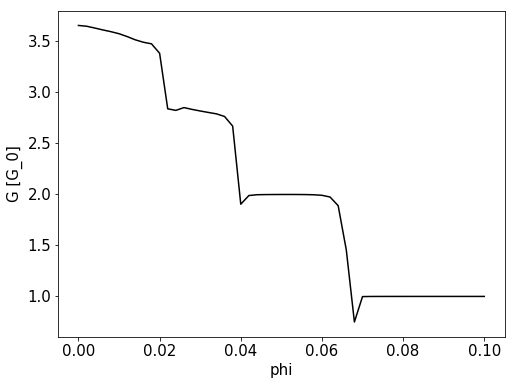

In [5]:
energy = 0.2
U0 = 0.3
salt = 13

phis = np.linspace(0, 0.1, 51)

Gs = []
for phi in phis:
    params = SimpleNamespace(phi=phi, U0=U0, salt=salt)
    smat = kwant.smatrix(sys, energy=energy, args=[params])
    Gs.append(smat.transmission(1, 0)) 
    
plt.plot(phis, Gs)
plt.ylabel("G [G_0]")
plt.xlabel("phi")

